In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from tqdm import tqdm
import json
import time
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/fall2022/cse512/project/hypoC

/content/drive/MyDrive/fall2022/cse512/project/hypoC


In [ ]:
with open('structure_to_category_epoch.json', 'r') as f:
  data=json.load(f)

In [ ]:
def getAccuracy(yhat, y):
  compare=np.equal(y, yhat)
  num_correct=np.count_nonzero(compare)
  return num_correct/len(compare)

Packing all the data

In [ ]:
Xtrain=[]
ytrain=[]
Xtest=[]
ytest=[]
for i in range(15000):
  train_video=data[i]
  test_video=data[i+15000]
  Xtrain.append([train_video['published_at'], train_video['trending_date'], train_video['comment_view_ratio']])
  ytrain.append(train_video['category'])

  Xtest.append([test_video['published_at'], test_video['trending_date'], test_video['comment_view_ratio']])
  ytest.append(test_video['category'])

In [ ]:
clf=ensemble.BaggingClassifier(max_samples=0.63, max_features=2/3).fit(Xtrain, ytrain)

In [ ]:
pred_train=clf.predict(Xtrain)
pred_test=clf.predict(Xtest)

In [ ]:
print(getAccuracy(pred_train, ytrain))
print(getAccuracy(pred_test, ytest))

0.9060666666666667
0.20626666666666665


In [108]:
train_accuracies=[]
test_accuracies=[]
for i in tqdm(range(0, 100, 10)):
  clf=ensemble.BaggingClassifier(n_estimators=i+10, max_samples=0.63, max_features=2/3).fit(Xtrain, ytrain)
  pred_train=clf.predict(Xtrain)
  pred_test=clf.predict(Xtest)
  train_accuracies.append(getAccuracy(pred_train, ytrain))
  test_accuracies.append(getAccuracy(pred_test, ytest))

100%|██████████| 10/10 [00:27<00:00,  2.71s/it]


In [ ]:
print(train_accuracies)
print(test_accuracies)

[0.8965333333333333, 0.9707333333333333, 0.9878, 0.9936666666666667, 0.9962, 0.9974666666666666, 0.9978666666666667, 0.9984, 0.9983333333333333, 0.999]
[0.20946666666666666, 0.21613333333333334, 0.21493333333333334, 0.21733333333333332, 0.22193333333333334, 0.2274, 0.2242, 0.2166, 0.22393333333333335, 0.23093333333333332]


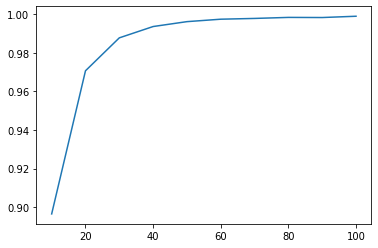

In [ ]:
plt.plot(range(10, 110, 10), train_accuracies)

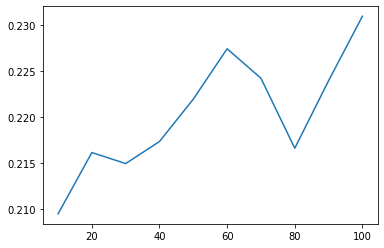

In [ ]:
plt.plot(range(10, 110, 10), test_accuracies)

try to do it with svm

In [ ]:
clf=make_pipeline(StandardScaler(), svm.SVC(gamma='auto'))
clf.fit(Xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
pred_train=clf.predict(Xtrain)
pred_test=clf.predict(Xtest)
print(getAccuracy(pred_train, ytrain))
print(getAccuracy(pred_test, ytest))

0.22246666666666667
0.21326666666666666
